In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import AllTogether as t
import seaborn as sns
%matplotlib inline



In [3]:
#Import dataset
data = pd.read_csv('./2015.csv')
data.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENUM,...,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
0,1.0,1.0,b'01292015',b'01',b'29',b'2015',1200.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0
1,1.0,1.0,b'01202015',b'01',b'20',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,2.0,2.0,3.0,3.0,4.0,2.0,2.0,NaN,NaN,2.0
2,1.0,1.0,b'02012015',b'02',b'01',b'2015',1200.0,2.015000e+09,2.015000e+09,1.0,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,NaN
3,1.0,1.0,b'01142015',b'01',b'14',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,9.0
4,1.0,1.0,b'01142015',b'01',b'14',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0


In [4]:
print(data.shape)

(441456, 330)


In [5]:
# Data Cleaning

In [6]:
# Drop Rows with missing Diabetes Response
data = data.dropna(subset = ['DIABETE3'], axis = 0)
#Drop Rows where caller refused to answer Diabetes Question or were unsure
data = data[data['DIABETE3'] != 9]
data = data[data['DIABETE3'] != 7]
data.shape[0]
# Make the Response Model Yes or No 
#1 = Yes 0 = No
data['DIABETE3'] = data['DIABETE3'].replace([2],1)
data['DIABETE3'] = data['DIABETE3'].replace([4],0)
data['DIABETE3'] = data['DIABETE3'].replace([3],0)

In [7]:
#Drop columns with 50% or more missing data
data_1 = data.dropna(axis = 1, thresh = 220628)
print(data_1.shape)

(440658, 180)


In [8]:
list(data_1.columns)

['_STATE',
 'FMONTH',
 'IDATE',
 'IMONTH',
 'IDAY',
 'IYEAR',
 'DISPCODE',
 'SEQNO',
 '_PSU',
 'CTELENUM',
 'PVTRESD1',
 'STATERES',
 'CELLFON3',
 'NUMADULT',
 'NUMMEN',
 'NUMWOMEN',
 'GENHLTH',
 'PHYSHLTH',
 'MENTHLTH',
 'POORHLTH',
 'HLTHPLN1',
 'PERSDOC2',
 'MEDCOST',
 'CHECKUP1',
 'BPHIGH4',
 'BLOODCHO',
 'CHOLCHK',
 'TOLDHI2',
 'CVDINFR4',
 'CVDCRHD4',
 'CVDSTRK3',
 'ASTHMA3',
 'CHCSCNCR',
 'CHCOCNCR',
 'CHCCOPD1',
 'HAVARTH3',
 'ADDEPEV2',
 'CHCKIDNY',
 'DIABETE3',
 'SEX',
 'MARITAL',
 'EDUCA',
 'RENTHOM1',
 'NUMHHOL2',
 'CPDEMO1',
 'VETERAN3',
 'EMPLOY1',
 'CHILDREN',
 'INCOME2',
 'INTERNET',
 'WEIGHT2',
 'HEIGHT3',
 'QLACTLM2',
 'USEEQUIP',
 'BLIND',
 'DECIDE',
 'DIFFWALK',
 'DIFFDRES',
 'DIFFALON',
 'SMOKE100',
 'USENOW3',
 'ALCDAY5',
 'FRUITJU1',
 'FRUIT1',
 'FVBEANS',
 'FVGREEN',
 'FVORANG',
 'VEGETAB1',
 'EXERANY2',
 'EXRACT11',
 'EXEROFT1',
 'EXERHMM1',
 'EXRACT21',
 'STRENGTH',
 'SEATBELT',
 'FLUSHOT6',
 'PNEUVAC3',
 'HIVTST6',
 'PCDMDECN',
 'QSTVER',
 'QSTLANG',
 'EXACTO

In [9]:
#Remove callers who did not finish survey
Complete_data = data_1[data_1['DISPCODE'] != 1200]
print(Complete_data.shape)

(374441, 180)


In [157]:
Complete_data.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENUM,...,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_AIDTST3
1,1.0,1.0,b'01202015',b'01',b'20',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,2.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,2.0,2.0
3,1.0,1.0,b'01142015',b'01',b'14',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,2.0,2.0,4.0,2.0,1.0,1.0,1.0,1.0,1.0,9.0
4,1.0,1.0,b'01142015',b'01',b'14',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,2.0,2.0,4.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0
5,1.0,1.0,b'01142015',b'01',b'14',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,1.0,2.0,2.0,2.0,1.0,2.0,3.0,1.0,1.0,2.0
6,1.0,1.0,b'01052015',b'01',b'05',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,1.0,2.0,2.0,2.0,3.0,3.0,4.0,1.0,1.0,1.0


In [158]:
#Look at number of Rows without any NA
Complete_data2 = Complete_data.dropna()
print(Complete_data2.shape)

(35301, 180)


In [10]:
#Keep Columns without NA
Complete_data = Complete_data.dropna(axis = 1, how = 'any')
print(Complete_data.shape)

(374441, 118)


In [11]:
#Focus on smaller set of columns to answer Questions
Complete_data = Complete_data[['DIABETE3','_AGEG5YR', 'WEIGHT2', 'INCOME2', 'EDUCA', '_RACE', 'MENTHLTH', 'SEX', '_STATE']]
Complete_data= Complete_data.rename(columns = {'DIABETE3': 'Diabetes', '_AGEG5YR': 'AgeGroup', 'WEIGHT2': 'Weight', 
                                               'INCOME2': 'IncomeGroup', 'EDUCA': 'EducationLevel', '_RACE':'Race', 
                                               'MENTHLTH':'MentallyHealthyDays', 'SEX': 'Gender', '_STATE': 'State'})


Complete_data.head()

,Diabetes,AgeGroup,Weight,IncomeGroup,EducationLevel,Race,MentallyHealthyDays,Gender,State
1,0.0,7.0,165.0,1.0,6.0,1.0,88.0,2.0,1.0
3,0.0,9.0,180.0,8.0,4.0,1.0,30.0,2.0,1.0
4,0.0,9.0,142.0,77.0,5.0,1.0,88.0,2.0,1.0
5,0.0,11.0,145.0,6.0,3.0,1.0,88.0,2.0,1.0
6,0.0,11.0,148.0,4.0,5.0,7.0,3.0,2.0,1.0


In [12]:
#Values with a 9 to start are Metric - Convert all to lbs
Complete_data['Weight'] = np.where(Complete_data['Weight'] > 8999,
                                           (Complete_data['Weight'] - 9000)*2.20462,
                                           Complete_data['Weight'])
bins = [0,100,150,200,250,300,350,400,1000,9999]
labels = ['Under 100', '100-150', '151-200', '201-250', '251-300', '301-350', '351-400', '400+','Refused/Unknown']
Complete_data['WeightGroup'] = pd.cut(Complete_data['Weight'], bins=bins, labels=labels, right=False)

In [162]:
#Ensure max weight is not above 9000
np.max(Complete_data['Weight'])

7777.0

In [164]:
## Can Diabetes be predicted well knowing age, weight, income, education, race, mental health, gender, and state?
# Model
y = Complete_data['Diabetes']
X = Complete_data[['AgeGroup','WeightGroup','IncomeGroup','EducationLevel','Race','MentallyHealthyDays','Gender','State']]
X = X.replace({'WeightGroup':{'Under 100':100, '100-150':150, '151-200':200, '201-250':250, '251-300':300, '301-350':350, '351-400':400, '400+':500,'Refused/Unknown':7777}})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 24)
lm_model = LinearRegression(normalize = True)
lm_model.fit(X_train, y_train)
y_test_pred = lm_model.predict(X_test)
test_score = r2_score(y_test, y_test_pred)
print(test_score)

0.0442705814665


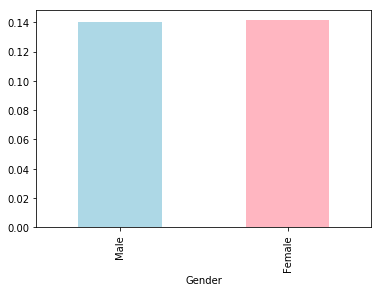

In [178]:
#Is diabetes more prevelant in one gender over the other
Complete_data.groupby(['Gender']).mean()['Diabetes']
Gender_data = Complete_data.replace({'Gender':{1.0:'Male', 2.0:'Female'}})
(Gender_data.groupby(['Gender']).mean()['Diabetes'].sort_values().dropna()).plot(kind='bar', color=['lightblue','lightpink'])

In [209]:
Complete_data.groupby(['Gender']).mean()['Diabetes']

Gender
1.0    0.140243
2.0    0.141468
Name: Diabetes, dtype: float64

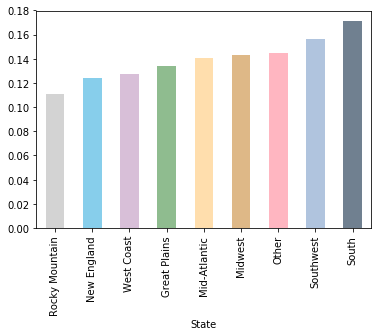

In [203]:
# Is Diabetes more prevelant in a region?
Complete_data.groupby(['State']).mean()['Diabetes']
#1.0:'Alabama', 2.0:'Alaska',4.0:'Arizona', 5.0:'Arkansas',6.0:'California',8.0:'Colorado', 
#9.0:'Connecticut', 10.0:'Delaware', 11.0:'District of Columbia', 12.0:'Florida', 13.0:'Georgia', 
 #15.0:'Hawaii', 16.0:'Idaho', 17.0:'Illinois', 18.0:'Indiana', 19.0:'Iowa', 20.0:'Kansas', 
 ## 21.0:'Kentucky', 22.0:'Louisiana', 23.0:'Maine', 24.0:'Maryland', 25.0:'Massachusetts', 
#26.0:'Michigan', 27.0:'Minnesota', 28.0:'Mississippi', 29.0:'Missouri', 30.0:'Montana', 
 # 31.0:'Nebraska', 32.0:'Nevada', 33.0:'New Hampshire', 34.0:'New Jersey', 35.0:'New Mexico', 
 #36.0:'New York', 37.0:'North Carolina', 38.0:'North Dakota', 39.0:'Ohio', 40.0:'Oklahoma', 
# 41.0:'Oregon', 42.0:'Pennsylvania', 44.0:'Rhode Island', 45.0:'South Carolina', 
 #46.0:'South Dakota', 47.0:'Tennessee', 48.0:'Texas', 49.0:'Utah', 50.0:'Vermont', 
## 51.0:'Virginia', 53.0:'Washington', 54.0:'West Virginia', 55.0:'Wisconsin', 56.0:'Wyoming', 
 #  66.0:'Guam', 72.0:'Puerto Rico'
State_data= Complete_data.replace({'State':{ 1.0:'South', 2.0:'Other',4.0:'Southwest', 5.0:'South',6.0:'West Coast',8.0:'Rocky Mountain', 
                              9.0:'New England', 10.0:'Mid-Atlantic', 11.0:'Mid-Atlantic', 12.0:'South', 13.0:'South', 
                              15.0:'Other', 16.0:'Rocky Mountain', 17.0:'Midwest', 18.0:'Midwest', 19.0:'Midwest', 20.0:'Great Plains', 
                              21.0:'Midwest', 22.0:'South', 23.0:'New England', 24.0:'Mid-Atlantic', 25.0:'New England', 
                              26.0:'Midwest', 27.0:'Midwest', 28.0:'South', 29.0:'Midwest', 30.0:'Rocky Mountain', 
                              31.0:'Great Plains', 32.0:'Southwest', 33.0:'New England', 34.0:'Mid-Atlantic', 35.0:'Southwest', 
                              36.0:'Mid-Atlantic', 37.0:'South', 38.0:'Great Plains', 39.0:'Midwest', 40.0:'Great Plains', 
                              41.0:'West Coast', 42.0:'Mid-Atlantic', 44.0:'New England', 45.0:'South', 
                              46.0:'Great Plains', 47.0:'South', 48.0:'Southwest', 49.0:'Rocky Mountain', 50.0:'New England', 
                              51.0:'South', 53.0:'West Coast', 54.0:'South', 55.0:'Midwest', 56.0:'Rocky Mountain', 
                              66.0:'Other', 72.0:'Other'}})
(State_data.groupby(['State']).mean()['Diabetes'].sort_values().dropna()).plot(kind='bar',color=['lightgrey','skyblue', 'thistle',
                                                                                                 'darkseagreen', 'navajowhite','burlywood',
                                                                                                'lightpink','lightsteelblue', 'slategray'])

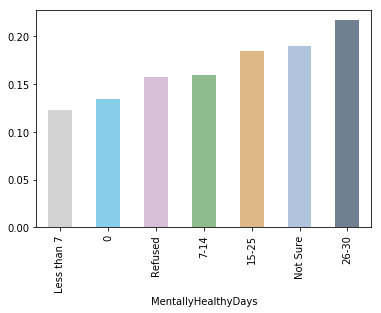

In [202]:
#Looking at mental heatlh
Complete_data.groupby(['MentallyHealthyDays']).mean()['Diabetes'].sort_values().dropna()
MentHealth_data= Complete_data.replace({'MentallyHealthyDays':{ 1.0:'Less than 7',2.0:'Less than 7',3.0:'Less than 7',
                            4.0:'Less than 7',5.0:'Less than 7', 6.0:'Less than 7', 7.0:'7-14',8.0:'7-14',9.0:'7-14',
                            10.0:'7-14',11.0:'7-14',12.0:'7-14',13.0:'7-14', 14.0:'7-14', 15.0:'15-25', 16.0:'15-25', 
                            17.0:'15-25', 18.0:'15-25', 19.0:'15-25', 20.0:'15-25', 21.0:'15-25', 22.0:'15-25', 23.0:'15-25', 
                            24.0:'15-25', 25.0:'15-25', 26.0:'26-30', 27.0:'26-30',28.0:'26-30',29.0:'26-30',30.0:'26-30',
                            77.0:'Not Sure', 88.0:'0', 99.0:'Refused'}})
(MentHealth_data.groupby(['MentallyHealthyDays']).mean()['Diabetes'].sort_values().dropna()).plot(kind='bar',color=['lightgrey','skyblue', 'thistle',
                                                                                                 'darkseagreen','burlywood',
                                                                                                'lightsteelblue', 'slategray'])

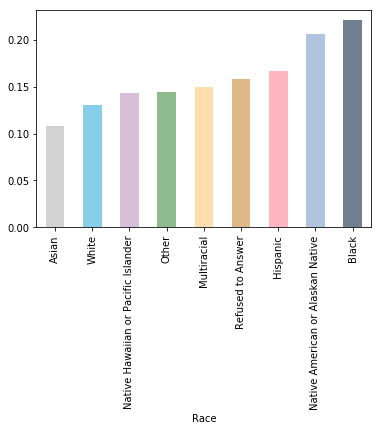

In [201]:
#Looking at race
Complete_data.groupby(['Race']).mean()['Diabetes'].sort_values().dropna()
Race_data = Complete_data.replace({'Race':{1.0:'White', 2.0:'Black',3.0:'Native American or Alaskan Native', 
                                     4.0:'Asian',5.0:'Native Hawaiian or Pacific Islander',6.0:'Other',  
                                     7.0: 'Multiracial', 8.0: 'Hispanic', 9.0:'Refused to Answer'}})
(Race_data.groupby(['Race']).mean()['Diabetes'].sort_values().dropna()).plot(kind='bar',color=['lightgrey','skyblue', 'thistle',
                                                                                                 'darkseagreen', 'navajowhite','burlywood',
                                                                                                'lightpink','lightsteelblue', 'slategray'])

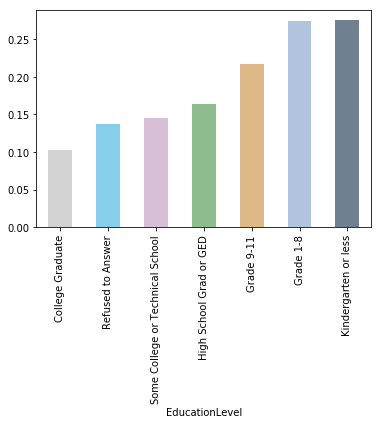

In [206]:
#Education and Diabetes
Educ_data = Complete_data.replace({'EducationLevel':{1.0:'Kindergarten or less', 2.0:'Grade 1-8',3.0:'Grade 9-11', 
                                                     4.0:'High School Grad or GED',5.0:'Some College or Technical School',
                                                     6.0:'College Graduate',  9.0:'Refused to Answer'}})
(Educ_data.groupby(['EducationLevel']).mean()['Diabetes'].sort_values().dropna()).plot(kind='bar',color=['lightgrey','skyblue', 'thistle',
                                                                                                 'darkseagreen', 'burlywood',
                                                                                                'lightsteelblue', 'slategray'])

In [205]:
Complete_data.groupby(['EducationLevel']).mean()['Diabetes'].sort_values().dropna()

EducationLevel
6.0    0.103043
9.0    0.136691
5.0    0.144439
4.0    0.163479
3.0    0.216238
2.0    0.273899
1.0    0.275053
Name: Diabetes, dtype: float64

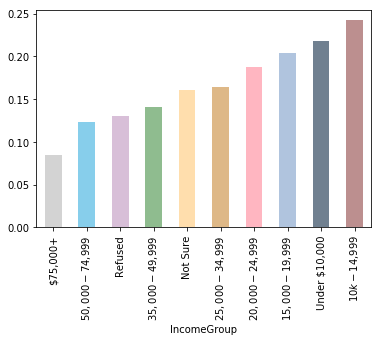

In [199]:
#Income and Diabetes
Inc_data = Complete_data.replace({'IncomeGroup':{1.0:'Under $10,000', 2.0:'$10k-$14,999',3.0:'$15,000-$19,999', 
                                      4.0:'$20,000-$24,999',5.0:'$25,000-$34,999',6.0:'$35,000-$49,999',  
                                      7.0:'$50,000-$74,999', 8.0:'$75,000+', 77:'Not Sure', 99:'Refused'}})
(Inc_data.groupby(['IncomeGroup']).mean()['Diabetes'].sort_values().dropna()).plot(kind='bar',color=['lightgrey','skyblue', 'thistle',
                                                                                                 'darkseagreen', 'navajowhite','burlywood',
                                                                                                'lightpink','lightsteelblue', 'slategray', 'rosybrown'])

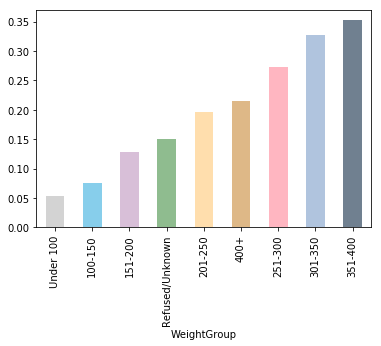

In [198]:
#Weight and Diabetes
bins = [0,100,150,200,250,300,350,400,1000,9999]
labels = ['Under 100', '100-150', '151-200', '201-250', '251-300', '301-350', '351-400', '400+','Refused/Unknown']
Weight_data = Complete_data
Weight_data['WeightGroup'] = pd.cut(Weight_data['Weight'], bins=bins, labels=labels, right=False)
(Weight_data.groupby(['WeightGroup']).mean()['Diabetes'].sort_values().dropna()).plot(kind='bar',color=['lightgrey','skyblue', 'thistle',
                                                                                                 'darkseagreen', 'navajowhite','burlywood',
                                                                                                'lightpink','lightsteelblue', 'slategray'])

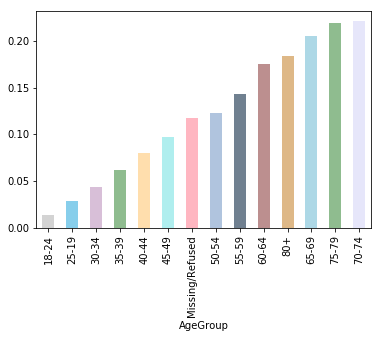

In [207]:
#Age and Diabetes
Age_data = Complete_data.replace({'AgeGroup':{1.0:'18-24', 2.0:'25-19',3.0:'30-34', 4.0:'35-39',5.0:'40-44',6.0:'45-49',  
                                              7.0:'50-54', 8.0:'55-59', 9.0:'60-64', 10.0:'65-69', 11.0:'70-74',
                                              12.0:'75-79', 13.0: '80+', 14.0:'Missing/Refused'}})
(Age_data.groupby(['AgeGroup']).mean()['Diabetes'].sort_values().dropna()).plot(kind='bar',color=['lightgrey','skyblue', 'thistle',
                                                                                                 'darkseagreen', 'navajowhite','paleturquoise',
                                                                                                'lightpink','lightsteelblue', 'slategray', 'rosybrown',
                                                                                                 'burlywood','lightblue','darkseagreen','lavender'])

In [208]:
Complete_data.groupby(['AgeGroup']).mean()['Diabetes'].sort_values().dropna()

AgeGroup
1.0     0.013473
2.0     0.029380
3.0     0.043586
4.0     0.062421
5.0     0.079665
6.0     0.097213
14.0    0.117940
7.0     0.122794
8.0     0.142737
9.0     0.175568
13.0    0.183736
10.0    0.205433
12.0    0.218802
11.0    0.221054
Name: Diabetes, dtype: float64

In [13]:
#Correlation matrix
corr =Complete_data.corr()
corr.style.background_gradient(cmap='coolwarm')

,Diabetes,AgeGroup,Weight,IncomeGroup,EducationLevel,Race,MentallyHealthyDays,Gender,State
Diabetes,1,0.173799,0.0102517,-0.00554968,-0.102818,0.0289956,-0.0148829,0.0017358,0.00655354
AgeGroup,0.173799,1,-0.00454681,0.0995397,-0.0391368,-0.160945,0.180682,0.0683056,-0.0144361
Weight,0.0102517,-0.00454681,1,0.120964,-0.0181781,0.0254198,0.0147098,0.0746006,0.00153882
IncomeGroup,-0.00554968,0.0995397,0.120964,1,-0.0293463,0.00677275,0.0532738,0.066086,-0.00395481
EducationLevel,-0.102818,-0.0391368,-0.0181781,-0.0293463,1,-0.158933,0.013524,-0.0128082,-0.0284859
Race,0.0289956,-0.160945,0.0254198,0.00677275,-0.158933,1,-0.00950839,-0.011961,0.0536876
MentallyHealthyDays,-0.0148829,0.180682,0.0147098,0.0532738,0.013524,-0.00950839,1,-0.097167,0.013616
Gender,0.0017358,0.0683056,0.0746006,0.066086,-0.0128082,-0.011961,-0.097167,1,0.00245581
State,0.00655354,-0.0144361,0.00153882,-0.00395481,-0.0284859,0.0536876,0.013616,0.00245581,1
